# 15 大数据与MapReduce

Apache的Hadoop是MapReduce框架的一个免费开源实现。

## 15.1 MapReduce：分布式计算的框架

MapReduce是一个软件框架，在大量节点组成的集群上运行。工作流程如下：

1. Map阶段：单个作业连同输入数据被分成很多小份，分发到每个节点，各个节点只在本地数据上做运算，对应的运算代码称为mapper。
2. sort阶段：mapper的输出通过某种方式组合或排序
3. reduce阶段：排序后的结果再被分成小份分发到各个节点进行下一步处理工作。对应的运行代码被称为reducer。
4. reducer的输出就是程序的最终执行结果。

> 在任何时候，每个mapper或reducer之间都不进行通信。每个节点只处理自己的事务，且在本地分配的数据集上运算。

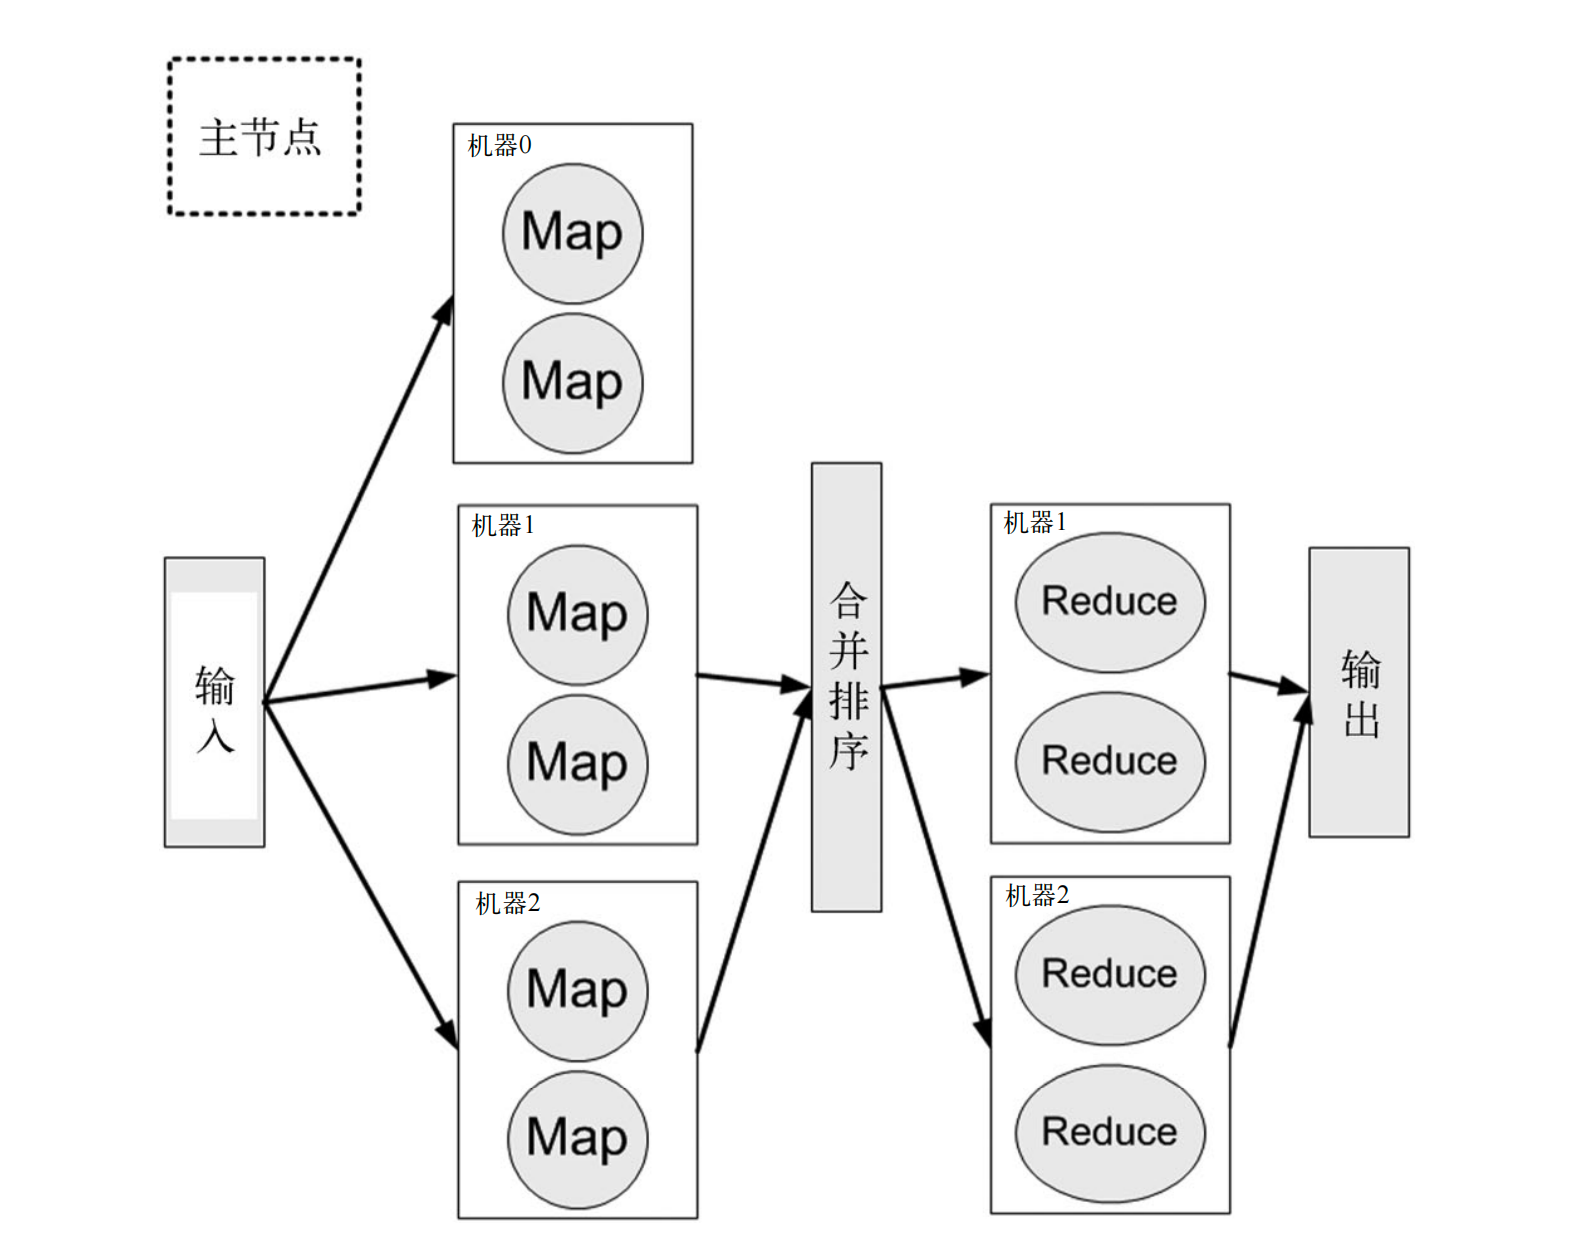

上图中每台机器都有两个处理器，可以同时处理两个map或者reduce任务。如果机器0在map阶段宕机，主节点将会发现这一点。主节点在发现该问题之后，会将机器0移出集群，并在剩余的节点上继续执行作业。在一些MapReduce的实现中，在多个机器上都保存有数据的多个备份，例如在机器0上存放的输入数据可能还存放在机器1上，以防机器0出现问题。同时，每个节点都必须与主节点通信，表明自己工作正常。如果某节点失效或者工作异常，主节点将重启该节点或者将该节点移出可用机器池。

总结一下上面几个例子中关于MapReduce的学习要点： 
- 主节点控制MapReduce的作业流程； 
- MapReduce的作业可以分成map任务和reduce任务； 
- map任务之间不做数据交流，reduce任务也一样； 
- 在map和reduce阶段中间，有一个sort或combine阶段； 
- 数据被重复存放在不同的机器上，以防某个机器失效； 
- mapper和reducer传输的数据形式为key/value对。 

## 15.2 Hadoop 流

除了分布式计算之外，Hadoop自带分布式文件系统。

Hadoop流很像Linux系统中的管道（管道使用符号|，可以将一个命令的输出作为另一个命令的输入）。

如果用mapper.py调用mapper，用reducer.py调 用reducer，那么Hadoop流就可以像Linux命令一样执行，例如：

```bash

cat InputFile.txt | python mapper.py | sort | python reducer.py > OutPutFile.txt

```

In [7]:
import pyspark

ModuleNotFoundError: No module named 'pyspark'